# chapter 6

# Decision Tree

1. Like SVMs, Decision Trees are versatile Machine Learning algorithms that can per‐
form both classification and regression tasks, and even multioutput tasks
capable of fitting complex datasets. 
2. fundamental components of Random Forests 
3. One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.

In [50]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [53]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
dt.classes_

array([0, 1, 2])

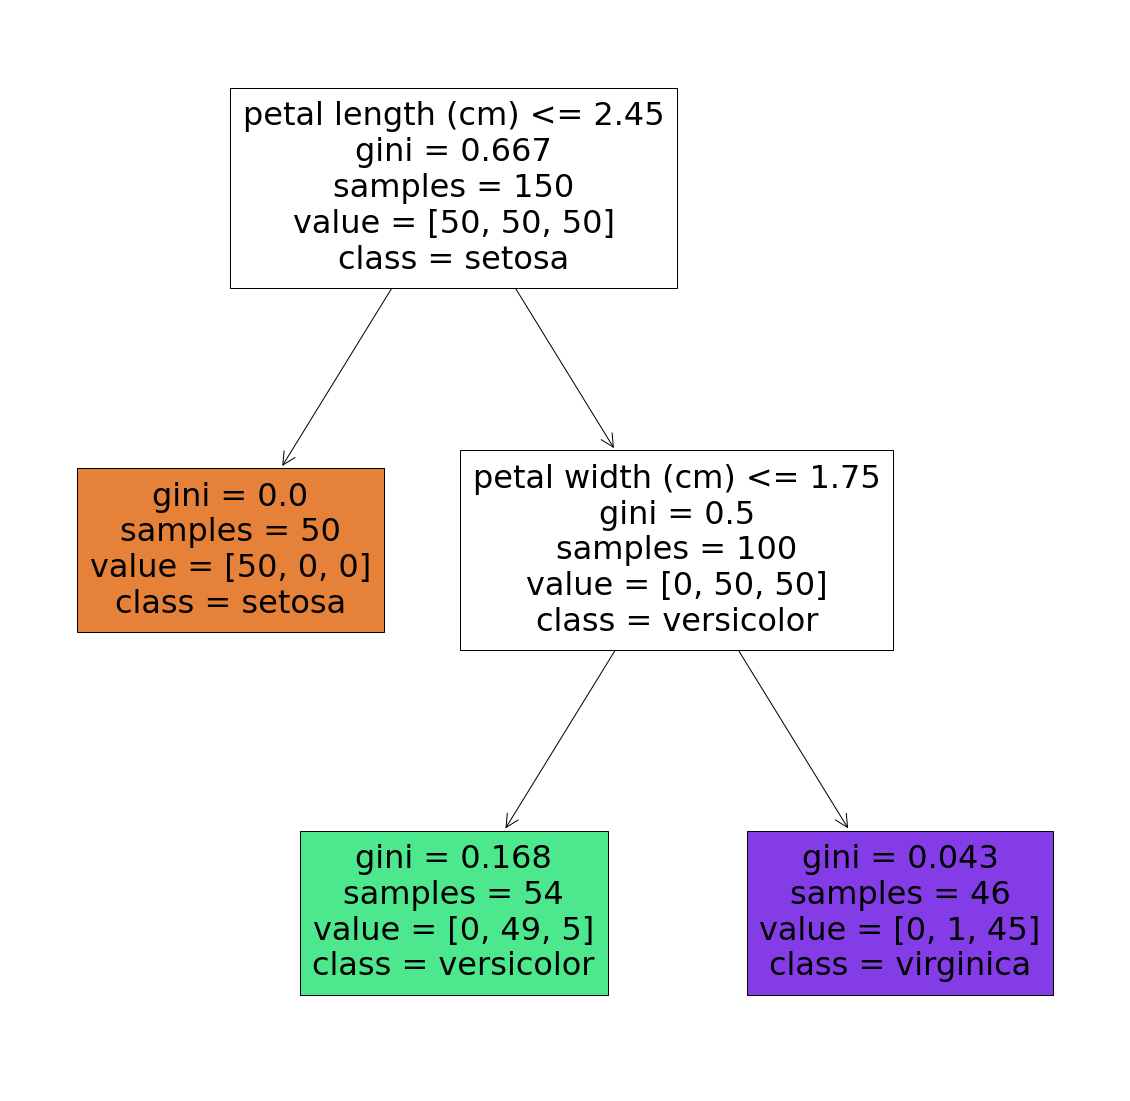

In [63]:
#visualisatilon of tree
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True, feature_names=iris.feature_names[2:],class_names=iris.target_names)
plt.savefig('dt_model_1')
plt.show()

1. node’s samples attribute counts how many training instances it applies to. 
2. node’s value attribute tells you how many training instances of each class this node
applies to: 
3. a node’s gini attribute measures its impur‐
ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. 

Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two chil‐
dren.

# Estimating Class Probabilities
A Decision Tree can also estimate the probability that an instance belongs to a partic‐
ular class k: 

first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node. 

In [68]:
print(dt.predict_proba([[5, 1.5]]))
print(dt.predict([[5, 1.5]]))
print(dt.predict_proba([[4, 1]]))

[[0.         0.90740741 0.09259259]]
[1]
[[0.         0.90740741 0.09259259]]


Notice that the estimated probabilities would be identical anywhere in the perticular portion of  Decision Tree’s decision boundaries.

# The CART Training Algorithm

1.Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). 
2. the algo‐
rithm first splits the training set in two subsets using a single feature k and a thres‐
hold tk
 (e.g., “petal length ≤ 2.45 cm”). 
3. How does it choose k and tk
? It searches for the
pair (k, tk
) that produces the purest subsets (weighted by their size). 
4. The cost function
that the algorithm tries to minimize is given by Equation 6-2.


J k, t
k
=
mleft
m
Gleft +
mright
m
Gright

where
Gleft/right measures the impurity of the left/right subset,
mleft/right is the number of instances in the left/right subset.

As you can see, the CART algorithm is a greedy algorithm: it greed‐
ily searches for an optimum split at the top level, then repeats the
process at each level. 

It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.

# Computational Complexity
1. Making predictions requires traversing the Decision Tree from the root to a leaf.
2. Decision Trees are generally approximately balanced, so traversing the Decision Tree
requires going through roughly O(log2
(m)) nodes.3
 
3. Since each node only requires
checking the value of one feature, the overall prediction complexity is just O(log2
(m)),
independent of the number of features. So predictions are very fast, even when deal‐
ing with large training sets.


However, the training algorithm compares all features (or less if max_features is set)
on all samples at each node. This results in a training complexity of O(n × m log(m)).
For small training sets (less than a few thousand instances), Scikit-Learn can speed up
training by presorting the data (set presort=True), but this slows down training con‐
siderably for larger training sets.

# Gini Impurity or Entropy?

1. Shannon’s information theory, where it measures
the average information content of a message:4
 entropy is zero when all messages are identical. 
2. In Machine Learning, it is frequently used as an impurity measure: a set’s
entropy is zero when it contains instances of only one class.

use Gini impurity or entropy? 
1. most of the time it does not
make a big difference: they lead to similar trees. 
2. Gini impurity is slightly faster to
compute, so it is a good default. 
3. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, 
4. while entropy tends to
produce slightly more balanced trees.

# Regularization Hyperparameters

1. Decision Trees make very few assumptions about the training data (as opposed to lin‐
ear models, which obviously assume that the data is linear, for example). 
2. If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. 
4. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. 
5. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).

regularization

6. To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. 
7. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. 
8. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting

 few other parameters that similarly restrict
the shape of the Decision Tree: 


1. min_samples_split (the minimum number of sam‐
ples a node must have before it can be split), 
2. min_samples_leaf (the minimum num‐
ber of samples a leaf node must have), 
3. min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weightedinstances), 
4. max_leaf_nodes (maximum number of leaf nodes), and 
5. max_features
(maximum number of features that are evaluated for splitting at each node). 

Increas‐
ing min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.


pruning
Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. 

# Regression

In [5]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2)

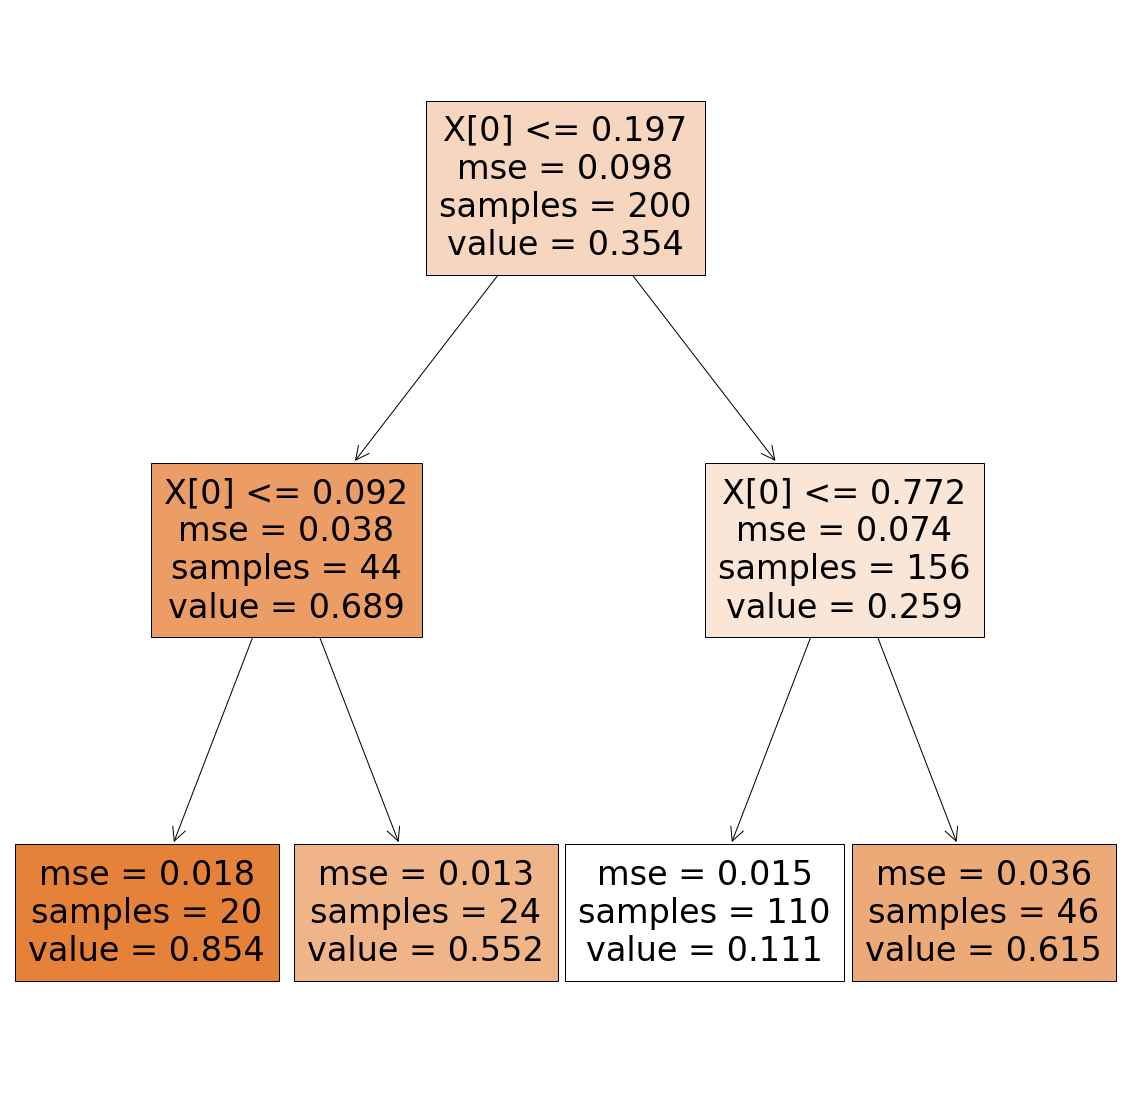

In [75]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_reg,filled=True)
plt.savefig('dt_model_1')
plt.show()

w the pre‐
dicted value for each region is always the average target value of the instances in that
region. The algorithm splits each region in a way that makes most training instances
as close as possible to that predicted value.


The CART algorithm works mostly the same way as earlier, except that instead of try‐
ing to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE. Equation 6-4 shows the cost function
that the algorithm tries to minimize.

 Decision Trees are prone to overfitting when dealing
with regression tasks. Without any regularization

Instability

More generally, the main issue with Decision Trees is that they are very sensitive to
small variations in the training data.

Random Forests can limit this instability by averaging predictions over many trees, as
we will see in the next chapter.